Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\Neha pc\LinearReg1\datasets_insurance.csv",index_col=0,header=0)
data.head()

,age,sex,bmi,children,smoker,region,charges
1,19,female,27.900,0,yes,southwest,16884.92400
2,18,male,33.770,1,no,southeast,1725.55230
3,28,male,33.000,3,no,southeast,4449.46200
4,33,male,22.705,0,no,northwest,21984.47061
5,32,male,28.880,0,no,northwest,3866.85520


Create a dataframe named "data" from the given datafile and print it's head

In [3]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
data.shape

(1338, 7)

Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [16]:
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,0.971599,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.219059,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,1.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Check if there are missing values. If yes, handle them.

In [5]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data["sex"]=data["sex"].map({"male":1,"female":0})

In [7]:
data["smoker"]=data["smoker"].map({"yes":1,"no":0})

In [8]:
data["region"]=data["region"].map({"southwest":3,"southeast":0,"northwest":1,"northeast":0})

In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
1,19,0,27.900,0,1,3,16884.92400
2,18,1,33.770,1,0,0,1725.55230
3,28,1,33.000,3,0,0,4449.46200
4,33,1,22.705,0,0,1,21984.47061
5,32,1,28.880,0,0,1,3866.85520


Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

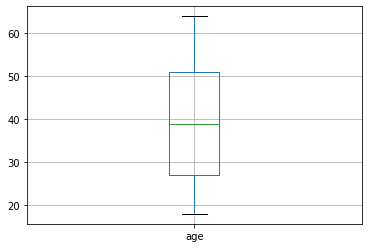

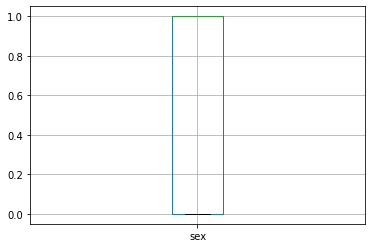

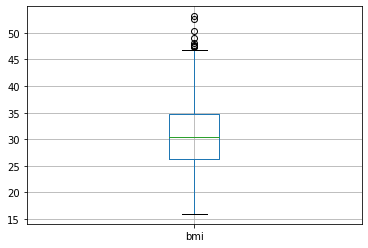

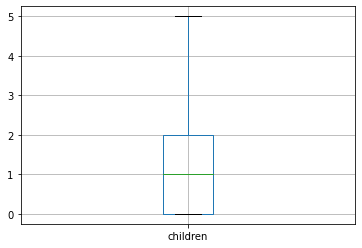

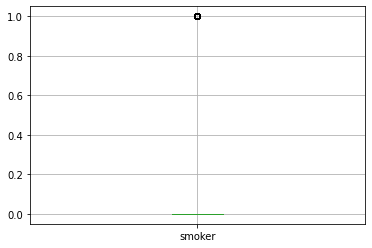

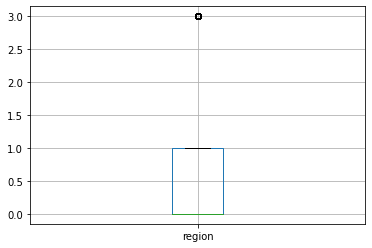

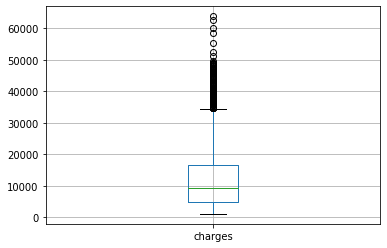

In [17]:
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

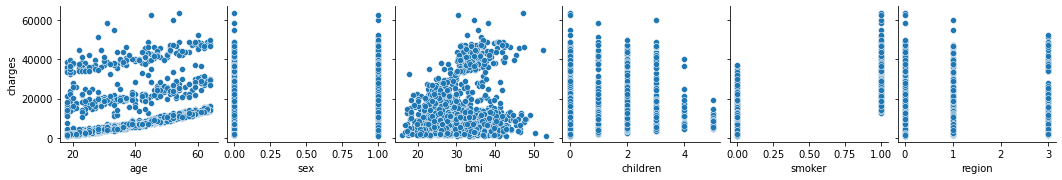

In [18]:
sns.pairplot(data,x_vars=['age','sex','bmi','children','smoker','region'],y_vars='charges',kind='scatter')

Create X and Y

In [19]:
X=data[['age','sex','bmi','children','smoker','region']]
Y=data['charges']
print(X.shape)
print(Y.shape)

(1338, 6)
(1338,)


Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

In [20]:
import warnings
warnings.filterwarnings("ignore")

<AxesSubplot:xlabel='charges', ylabel='Density'>

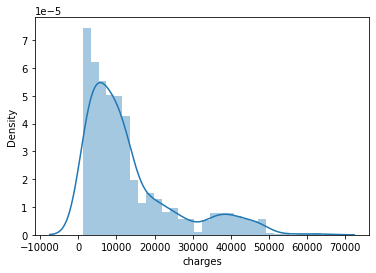

In [21]:
sns.distplot(Y)

<AxesSubplot:xlabel='charges', ylabel='Density'>

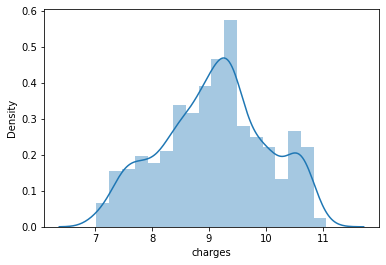

In [22]:
Y_log=np.log(Y)
sns.distplot(Y_log,hist=True)

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of map function. Refer to clustering code file.<br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3

Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.010431
sex      -0.020856  1.000000  0.046371  0.017163  0.076185 -0.008343
bmi       0.109272  0.046371  1.000000  0.012759  0.003750 -0.054409
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.031864
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.052006
region    0.010431 -0.008343 -0.054409  0.031864 -0.052006  1.000000


<AxesSubplot:>

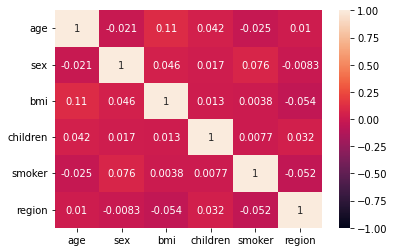

In [24]:
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1,vmin=-1,annot=True)

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_data = pd.DataFrame()
vif_data["features"] = X.columns
vif_data["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]#Here X.shape returns rows and columns but 
#here [1] takes columns tv,radio,np, i inrange 0,1,2 and then vif takes all values of X but when i=0 which means when i point
# out to radio then radio will be dependent variable and other two will be IV. and so on
vif_data.round(2)

,features,VIF Factor
0,age,7.61
1,sex,2.00
2,bmi,8.97
3,children,1.81
4,smoker,1.26
5,region,1.59


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [25]:
from sklearn.model_selection import train_test_split

#split the data into test and train
X_train, X_test, Y_train, Y_test=train_test_split(X,Y_log, test_size=0.2, random_state=10)

In [26]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1070, 6)
(1070,)
(268, 6)
(268,)


Build a base Linear Regression model using sklearn.

In [27]:
from sklearn.linear_model import LinearRegression
#Create a model object
lm=LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

6.986410430272784
[ 0.03501125 -0.06975681  0.011463    0.09945198  1.56734714 -0.0128645 ]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [28]:
print(list(zip(X.columns, lm.coef_)))

[('age', 0.03501124898282227), ('sex', -0.06975680766918387), ('bmi', 0.011463003042213663), ('children', 0.09945197903871675), ('smoker', 1.5673471432384543), ('region', -0.012864501760004567)]


Predict using the model.

In [29]:
Y_pred=lm.predict(X_test)
print(Y_pred)

[ 8.88530178  8.54213373  9.4684532   9.40958873  8.28725412  8.88395572
  9.26808533  9.66110153  9.00069216 10.48792113  8.11017563  8.22666545
  8.7205193   9.10028344  9.1780388   9.34973415  8.35077111  9.83835226
  9.22024055 10.16510837 10.48331285  8.04168422  7.91826184  8.72882865
  8.46951357  9.39857476  9.04273644  9.40861999  8.44904806 10.23470094
  7.77024131 10.41439394  8.9263255   8.90978611  8.47780116  8.90751465
  9.41860591  9.11933728  9.05060064  8.93154531  9.61453078  9.1440146
  8.53015489  8.94507574  8.01844405  8.85643629  8.88160933 10.57064914
  9.26545349  9.2282019   9.94851166  8.34626543  8.9393215   9.5807769
  9.13161496  9.41422682  9.25927859  8.66329265  8.74310779 10.7308326
  7.83870416 10.6533153  11.05587358  7.9945681   9.98391213  8.90274853
  8.45887169  8.88880755  8.90299644  8.96905598  8.77938625  7.99054206
  8.83297673  8.87339804  9.01413431  9.28309942  8.58978844  8.8527372
  7.80313469  9.30619832  9.24656982  9.21400352  9.795

Evaluate the model.

In [30]:
lm.score(X_train,Y_train)

0.7793057957512317

In [31]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6989382741987782
RMSE: 0.4931844606744335
Adj R-square: 0.6975811214153016


<AxesSubplot:xlabel='charges'>

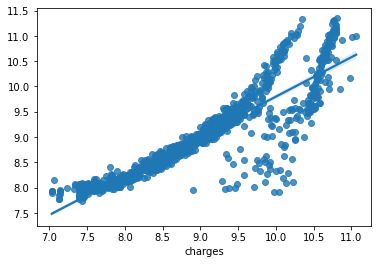

In [32]:
sns.regplot(x=Y_train, y=lm.predict(X_train),ci=95)

Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [68]:
from sklearn.linear_model import Ridge
lm=Ridge()
lm.fit(X_train, Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

9.092701626405862
[ 0.49126613 -0.03481204  0.06987629  0.11975329  0.63187958 -0.01569861]


In [69]:
Y_pred=lm.predict(X_test)

In [70]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6990138620505939
RMSE: 0.49312254464371114
Adj R-square: 0.6976570500087483


In [71]:
## Answer of the last question
Y_pred=lm.predict(X_test_sample)
print(Y_pred)

[38.59470421 35.39284248 27.66562586 42.48016542 32.59215394 32.65271075
 38.90967186]


In [72]:
Y_pred1=np.exp(Y_pred)
print(Y_pred1)

[5.77387088e+16 2.34917942e+15 1.03521046e+12 2.81126270e+18
 1.42755421e+14 1.51667349e+14 7.91144443e+16]


In [36]:
#Lasso
from sklearn.linear_model import Lasso
lm=Lasso()
lm.fit(X_train, Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

7.895875452206856
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [37]:
Y_pred=lm.predict(X_test)

In [38]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962498
RMSE: 0.7969415049819166
Adj R-square: 0.21033476029871412


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [39]:
new_df=pd.DataFrame()  #creating a empty df
new_df=X_train.copy()

new_df["charges"]=Y_train.copy()
new_df.shape

(1070, 7)

In [40]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>
Check for the Assumption 5- No autocorrelation 

In [41]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='charges ~ age + sex + bmi + children + smoker + region', 
                  data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    6.986410
age          0.035011
sex         -0.069757
bmi          0.011463
children     0.099452
smoker       1.567347
region      -0.012865
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     625.6
Date:                Tue, 23 Aug 2022   Prob (F-statistic):               0.00
Time:                        19:59:52   Log-Likelihood:                -625.13
No. Observations:                1070   AIC:                             1264.
Df Residuals:                    1063   BIC:                             1299.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

Predict using the model. Evaluate the model.

In [42]:
Y_pred_new=lm_model.predict(X_test)

In [43]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred_new)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred_new))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6989382741987786
RMSE: 0.493184460674433
Adj R-square: 0.697581121415302


Check for Assumption 6-Errors should be random.<br>
Hint: Diagnostic plot

Text(0, 0.5, 'Residuals')

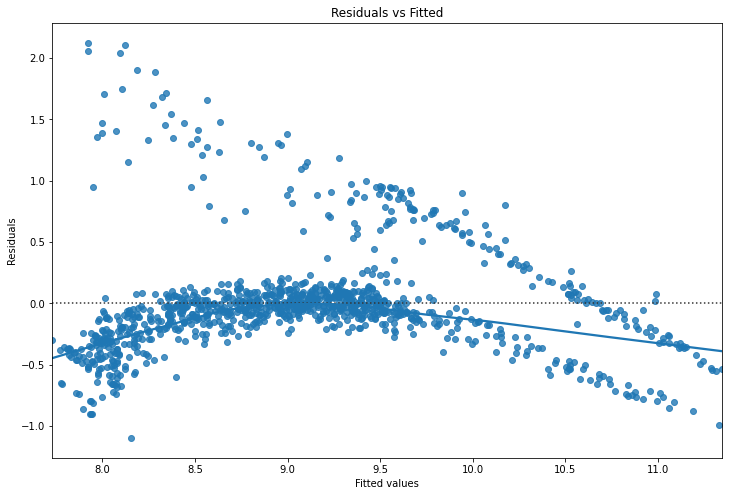

In [44]:
import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'charges', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

Check for Assumption 7-Errors should follow normal distribution.<br>
Hint: Diagnostic plot

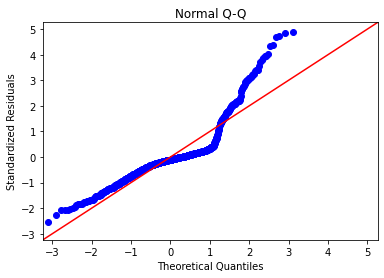

In [45]:
res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show()

Check for Assumption 8-Errors should folllow constant variance.<br>
Hint: Diagnostic plot

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

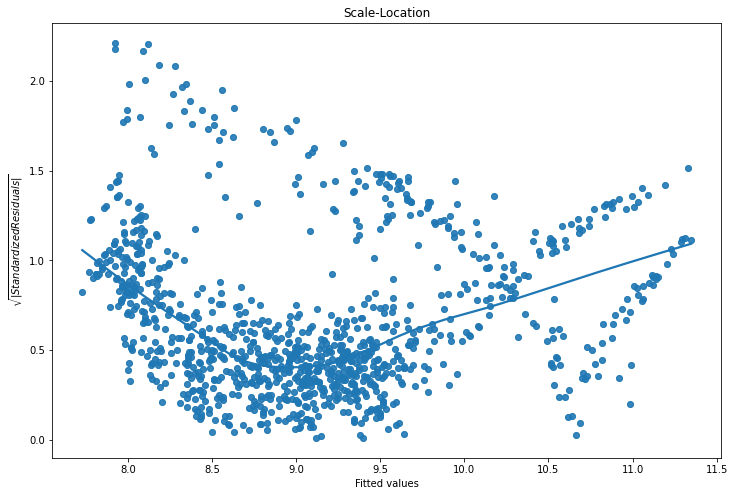

In [46]:
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

Scale the data using Standard Scaler to prepare it for SGD.

In [47]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()  # scaler is ibject
X=scaler.fit_transform(X)
#scaler.fit(X)
#X=scaler.transform(X)
print(X)

#



[[-1.43876426 -1.0105187  -0.45332    -0.90861367  1.97058663  1.66452956]
 [-1.50996545  0.98959079  0.5096211  -0.07876719 -0.5074631  -0.79730598]
 [-0.79795355  0.98959079  0.38330685  1.58092576 -0.5074631  -0.79730598]
 ...
 [-1.50996545 -1.0105187   1.0148781  -0.90861367 -0.5074631  -0.79730598]
 [-1.29636188 -1.0105187  -0.79781341 -0.90861367 -0.5074631   1.66452956]
 [ 1.55168573 -1.0105187  -0.26138796 -0.90861367  1.97058663  0.02330587]]


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [48]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_log, test_size=0.2,
                                                    random_state=10)  


Build the SGDRegressor.

In [49]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate              #hyper parameters:
                  eta0=0.01,  #alpha
                  shuffle=True, 
        #while going ahead with the next epoch shuffle the obs
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True, 
                  #stop if zero convergence is reached first
                  n_iter_no_change=5) 
        #no of obs to wait for before concluding upon early stopping
lm.fit(X_train,Y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

[9.10037333]
[ 0.52857222 -0.04488558  0.1498825   0.12977973  0.58322837 -0.05303218]


Predict using the model. Evaluate the model. Perform trial and error to reach the optimum model.

In [50]:
Y_pred=lm.predict(X_test)

In [51]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.6860449216725522
RMSE: 0.5036343777001826
Adj R-square: 0.6846296470895583


In [52]:
pd.set_option('display.float_format','{:.4f}'.format)

In [53]:
lm.n_iter_

11

In [54]:
lm.t_

11771.0

Write down your conclusion as to which is the final model that you would go with along with the reasons.

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [57]:
sample_data={"age":[56,51,31,64,44,43,56], "sex":[1,0,1,1,0,1,1], "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725], "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}

In [59]:
X_test_sample=pd.DataFrame.from_dict(sample_data)
X_test_sample.head()

,age,sex,bmi,children,smoker,region
0,56,1,19.9500,0,1,0
1,51,0,18.0500,0,0,1
2,31,1,34.3900,3,1,1
3,64,1,25.6000,2,0,3
4,44,0,23.9800,2,0,2


The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [64]:
Y_pred=lm.predict(X_test_sample)
print(Y_pred)

[38.59470421 35.39284248 27.66562586 42.48016542 32.59215394 32.65271075
 38.90967186]


Save the predicted values along with the observations into an excel file.

In [67]:
Y_pred1=np.exp(Y_pred)
print(Y_pred1)

[5.77387088e+16 2.34917942e+15 1.03521046e+12 2.81126270e+18
 1.42755421e+14 1.51667349e+14 7.91144443e+16]
